In [1]:
# Ramon Ulloa
import sys # modules in sys.path directories's are all available for import
sys.path.append('./DevelopedMethods')
from preprocessing import * # import our pre-processed dataset + imports.py (np, pd, df, df_train, X_train_balanced etc.)

Accuracy Score: 
0.9848153210655619

Area Under Curve: 
0.9604828766680513


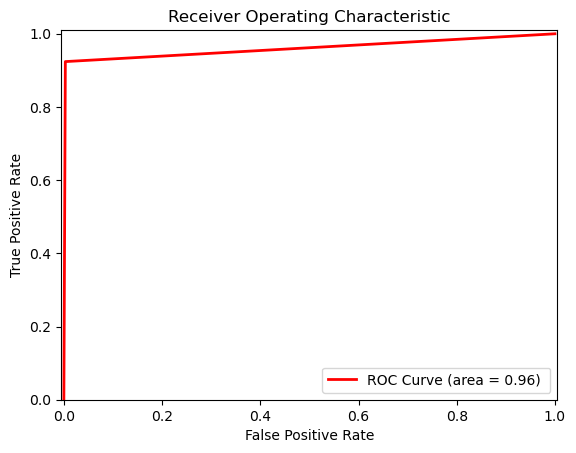

In [2]:
#Instantiating DecisionTreeClassifier object
ccfd_decisiontree = DecisionTreeClassifier()

#Training the model
ccfd_decisiontree.fit(X_train_balanced,  y_train_balanced)

#Using newly trained model with X_test_balanced to predict for Credit Card Fraud
decisiontree_prediction = ccfd_decisiontree.predict(X_test_balanced)

#Evaluating accuracy of model by comparing predicted labels with y_test values (actual)
score_dt = metrics.accuracy_score(y_test_balanced, decisiontree_prediction)

#Displaying final accuracy score
print("Accuracy Score: ")
print(score_dt)
print()

#Estimating the probability of Credit Card Fraud Label
decisiontree_prediction_probability = ccfd_decisiontree.predict_proba(X_test_balanced)

#Calculating true positive rate(tpr) and false positive rate(fpr)
fpr, tpr, thresholds = metrics.roc_curve(y_test_balanced, decisiontree_prediction_probability[:,1], pos_label=1)

#Calculating Area Under Curve
AUC = metrics.auc(fpr, tpr)
print("Area Under Curve: ")
print(AUC)

#Plotting graph for ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC Curve (area = %0.2f) ' % AUC)

#Defining range of x and y axes
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

#Defining labels, title and legend for graph
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right');

                   feature  importance
2                      amt    0.708722
25    category_grocery_pos    0.068402
23  category_gas_transport    0.023988
19                    hour    0.023974
13                     dob    0.022195


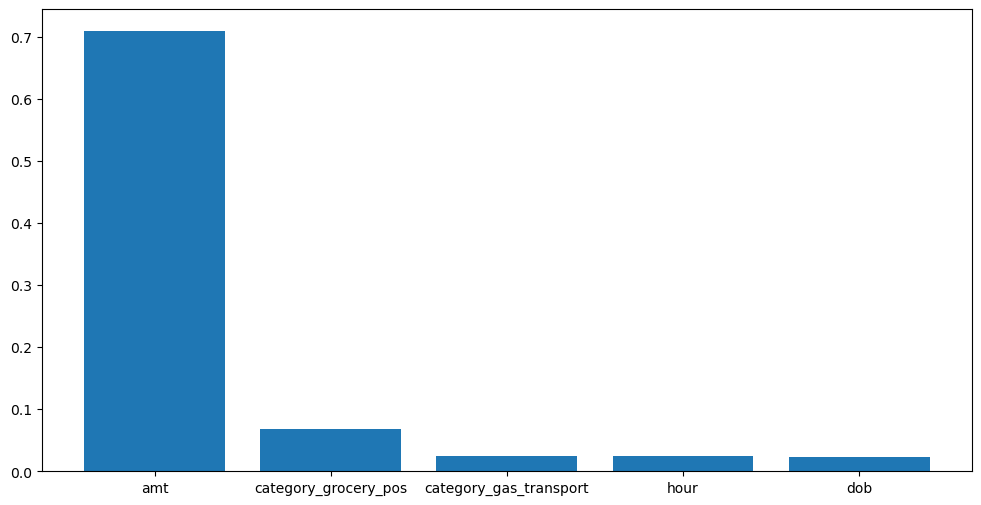

In [13]:
#Creating a new DataFrame object to hold the name of the feature as well as its corresponding feature importance value 
df_feature_importance = pd.DataFrame({'feature': X_train_balanced.columns, 'importance': ccfd_decisiontree.feature_importances_})

#Sorting the dataframe in descending order by feature importance value and printing out the head of the dataframe
feature_importance_sorted = df_feature_importance.sort_values(by='importance', ascending=False).head()
print(feature_importance_sorted.head())

#Plotting bar graph of the dataframet to visually display most important features
plt.figure(figsize=(12,6))
plt.bar(feature_importance_sorted['feature'], feature_importance_sorted['importance'])
plt.show()